In [1]:
import os
import numpy as np
from sklearn import metrics
from simpletransformers.classification import ClassificationModel
import pandas as pd
from scipy.special import softmax
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.colors import ListedColormap

## Utils

In [2]:
def create_path_models(model_name, data_folder, preprocessing, label, best_epoch):
    if model_name =="bert-base-cased-conversational" and preprocessing == '0':
            path_models = '/home/manuto/results_simpletransformers_{0}_{1}_{2}/DeepPavlov/{0}_{1}_{3}/models'.format(model_name,data_folder,str(preprocessing),label)
    elif model_name == "bert-base-uncased" and preprocessing == '1':
            path_models = '/home/manuto/results_simpletransformers_{0}_{1}_{2}/{0}_{1}_{3}_preprocessed/models'.format(model_name,data_folder,str(preprocessing),label)
    else:
            path_models = '/home/manuto/results_simpletransformers_{0}_{1}_{2}/{0}_{1}_{3}/models'.format(model_name,data_folder,str(preprocessing),label)
    epoch_names_dict = dict()
    for epoch_name in os.listdir(path_models):
        if epoch_name != "checkpoint-2000" and epoch_name != "checkpoint-4000" and epoch_name != "checkpoint-6000":
            epoch_names_dict[epoch_name.split("-")[3]] = epoch_name
    path_final = os.path.join(path_models, epoch_names_dict[best_epoch])
    return path_final

In [3]:
def get_pred(model_type, model_folder_path, path_eval_data, preprocessing):
    model = ClassificationModel(model_type, model_folder_path, args={'evaluate_during_training': True, 'evaluate_during_training_verbose': True, 'num_train_epochs': 20})
    print(path_eval_data)
    eval_df = pd.read_csv(path_eval_data)
    if preprocessing == "1":
        eval_df.columns = ["id", "text_raw", "labels", "text", "text_processed_length"]
    else:
        eval_df.columns = ["id", "text", "labels"]
    eval_df = eval_df[["text","labels"]]
    y_true = eval_df[["labels"]]
    result, model_outputs, wrong_predictions = model.eval_model(eval_df)
    probabilities = np.array([softmax(element) for element in model_outputs])
    y_pred = np.array([element[1] for element in probabilities])
    return [y_true, y_pred]

In [4]:
def create_path_eval_data(data_folder, preprocessing, label):
    if data_folder == "may5_7Klabels" and preprocessing == '0':
        return '/home/manuto/twitter/data/may5_7Klabels/data_binary_pos_neg_balanced_removed_allzeros/val_{}.csv'.format(label)
    elif data_folder == "may5_7Klabels" and preprocessing =='1':
        return '/home/manuto/twitter/data/may5_7Klabels/data_binary_pos_neg_balanced_removed_allzeros/preprocessed_glove/val_{}.csv'.format(label)
    elif data_folder == "may20_9Klabels" and preprocessing == '0':
        return '/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_{}.csv'.format(label)        
    elif data_folder == "may20_9Klabels" and preprocessing == '1':
        return '/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/preprocessed_glove/val_{}.csv'.format(label)

In [5]:
def plot_ROC(model_type, model_folder_path, path_eval_data, preprocessing, interval):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    results = get_pred(model_type, model_folder_path, path_eval_data, preprocessing)
    fpr["micro"], tpr["micro"], thresholds = metrics.roc_curve(results[0],results[1])
    results.append(thresholds)
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])    
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"], label='{0} (area = {1:0.2f})'
                                   ''.format(column, roc_auc["micro"]))
    count = 0
    for t,x,y in zip(thresholds, fpr["micro"],tpr["micro"]):
        count = count + 1

        label = "{:.3f}".format(t)

        if count%interval == 0:
            plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center'
                    ) # horizontal alignment can be left, right or center
    plt.annotate(label, # this is the text
         (x,y), # this is the point to label
         textcoords="offset points", # how to position the text
         xytext=(0,10), # distance from text to points (x,y)
         ha='center'
        ) # horizontal alignment can be left, right or center
    
    plt.plot([0, 1], [0, 1], 'k--') #line y=x
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")

    plt.show()  
    return results

## BERT base uncased on May20 data

In [6]:
model_type = 'bert'
model_name = 'bert-base-uncased'
data_folder = 'may20_9Klabels'
preprocessing = '0'
best_epochs = {
    'is_hired_1mo':'1',
    'lost_job_1mo':'2',
    'job_offer':'1',
    'is_unemployed':'2',
    'job_search':'3'
}

In [7]:
results_per_label = dict()

is_unemployed 20
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_is_unemployed.csv


HBox(children=(FloatProgress(value=0.0, max=732.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=92.0), HTML(value='')))

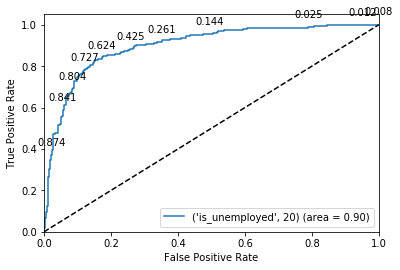

lost_job_1mo 10
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_lost_job_1mo.csv


HBox(children=(FloatProgress(value=0.0, max=358.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=45.0), HTML(value='')))

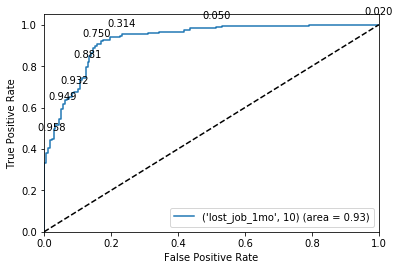

job_search 10
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_job_search.csv


HBox(children=(FloatProgress(value=0.0, max=436.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=55.0), HTML(value='')))

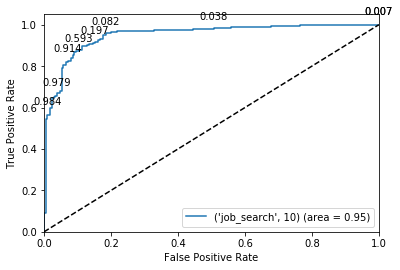

is_hired_1mo 10
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_is_hired_1mo.csv


HBox(children=(FloatProgress(value=0.0, max=297.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=38.0), HTML(value='')))

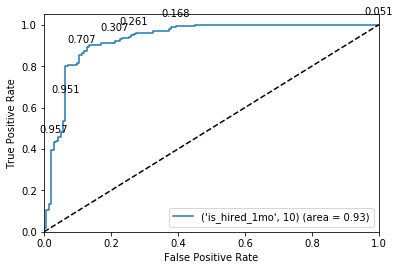

job_offer 20
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_job_offer.csv


HBox(children=(FloatProgress(value=0.0, max=692.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=87.0), HTML(value='')))

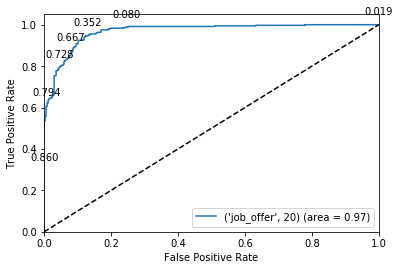

In [8]:
for column in [ ("is_unemployed",20), 
                 ("lost_job_1mo", 10),
                 ("job_search", 10),
                 ("is_hired_1mo", 10), 
                 ("job_offer", 20) 
              ]:
    print(column[0], column[1]) 
    path_eval_data = create_path_eval_data(data_folder, preprocessing, column[0])
    path_model = create_path_models(model_name, data_folder, preprocessing, column[0], best_epochs[column[0]])
    results_per_label[column[0]] = plot_ROC(model_type, path_model, path_eval_data, preprocessing, column[1])
#     plot_ROC('is_unemployed', 10)
    
# merged.head()

/home/manuto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


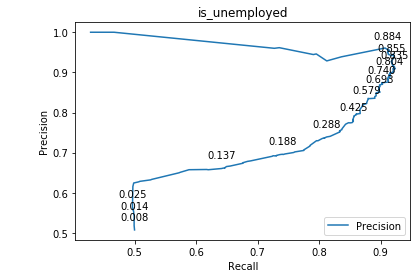

/home/manuto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


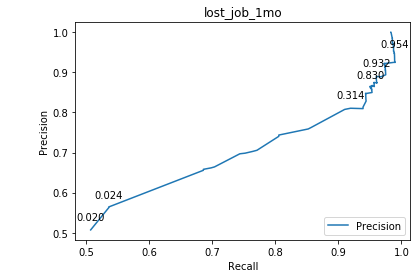

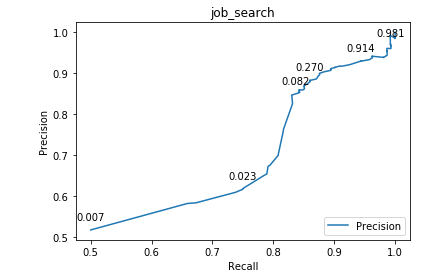

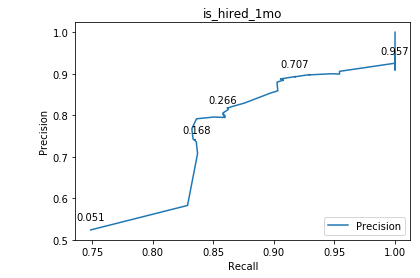

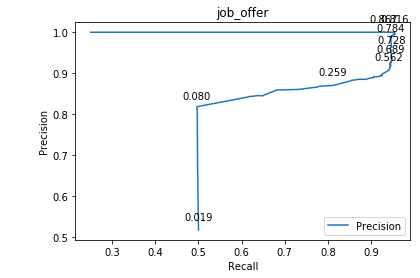

In [9]:
for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    results_bis = pd.DataFrame()
    y_true = results_per_label[column][0]
    y_pred = results_per_label[column][1]
    merged = pd.DataFrame(data=y_true)
    merged["pos_model"] = y_pred
    merged['neg_model'] = abs(1-merged['pos_model'])
    merged["pos"] = merged["labels"]
    merged['neg'] = abs(1-merged['pos'])
    threshold_list = results_per_label[column][2]
    for threshold in threshold_list:
        TP = np.sum(merged.loc[merged['pos_model'] > threshold, 'pos'])
        FP = np.sum(merged.loc[merged['pos_model'] > threshold, 'neg'])
        TN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])
        FN = np.sum(merged.loc[merged['neg_model'] > threshold, 'pos'])
        Recall = TP/(TP+FN)
        Precision = TP/(TP+FP)
        
        results_bis = results_bis.append({'threshold': threshold, 'Recall': Recall, 'Precision': Precision}, ignore_index=True)

    plt.figure()
    plt.plot(results_bis['Recall'], results_bis['Precision'])
    
    count = 0
    for t,x,y in zip(threshold_list, results_bis['Recall'], results_bis['Precision']):
#         print(t,x,y)
        count = count + 1

        label = "{:.3f}".format(t)

        if count%15 == 0 or count == 1:
#             print(count)
            plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center'
                    ) # horizontal alignment can be left, right or center
    plt.annotate(label, # this is the text
         (x,y), # this is the point to label
         textcoords="offset points", # how to position the text
         xytext=(0,10), # distance from text to points (x,y)
         ha='center'
        ) # horizontal alignment can be left, right or center
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(column)
    plt.legend(loc="lower right")

    plt.show()   

In [10]:
thresholds_dict = {
    'is_unemployed': 0.727,
    'lost_job_1mo':  0.881,
    'job_search':  0.593,  
    'is_hired_1mo':  0.707,
    'job_offer':     0.667,
}

is_unemployed Recall: 0.90 Precision 0.86
lost_job_1mo Recall: 0.95 Precision 0.86
job_search Recall: 0.88 Precision 0.90
is_hired_1mo Recall: 0.91 Precision 0.89
job_offer Recall: 0.94 Precision 0.92


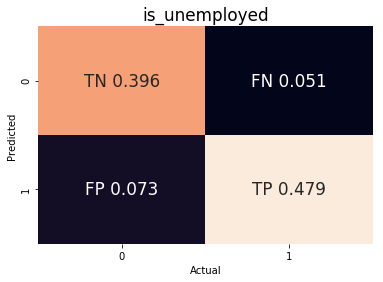

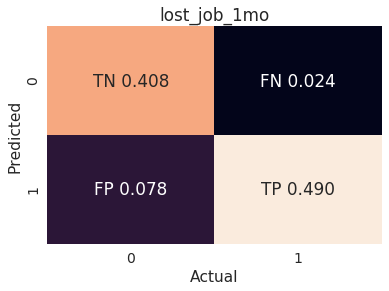

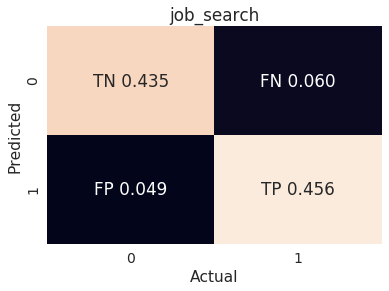

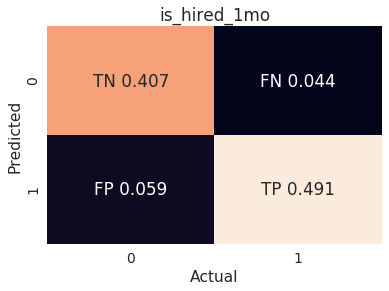

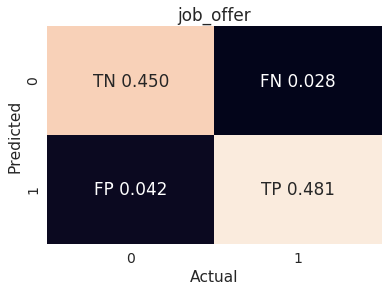

In [11]:
for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    y_true = results_per_label[column][0]
    y_pred = results_per_label[column][1]
    merged = pd.DataFrame(data=y_true)
    merged["pos_model"] = y_pred
    merged['neg_model'] = abs(1-merged['pos_model'])
    merged["pos"] = merged["labels"]
    merged['neg'] = abs(1-merged['pos'])
    threshold = thresholds_dict[column]
    TP = np.sum(merged.loc[merged['pos_model'] > threshold, 'pos'])
    FP = np.sum(merged.loc[merged['pos_model'] > threshold, 'neg'])
    TN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])
    FN = np.sum(merged.loc[merged['neg_model'] > threshold, 'pos'])    
    total = sum([TP, FP, TN, FN]) 
    print(column, 'Recall:', str(TP/(TP+FN))[:4],  'Precision', str(TP/(TP+FP))[:4],
         )

    confusion_matrix = np.array([
                                [TN/total, FN/total],
                                [FP/total, TP/total]
                                ])
    labels =           np.array([
                                ['TN', 'FN'],
                                ['FP', 'TP']
                                ])
    
    labels = (np.asarray(["{0} {1:.3f}".format(string, value)
                      for string, value in zip(labels.flatten(),
                                               confusion_matrix.flatten())])
         ).reshape(2, 2)
    
    fig, ax = plt.subplots(1)
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(confusion_matrix, annot=labels, fmt="", cbar=False)
    ax.set(xlabel='Actual', ylabel='Predicted')
    plt.title(column)

## ConvBERT on May20 data

In [6]:
model_type = 'bert'
model_name = 'bert-base-cased-conversational'
data_folder = 'may20_9Klabels'
preprocessing = '0'
best_epochs = {
    'is_hired_1mo':'2',
    'lost_job_1mo':'2',
    'job_offer':'3',
    'is_unemployed':'1',
    'job_search':'1'
}

In [7]:
results_per_label = dict()

is_unemployed 20
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_is_unemployed.csv


HBox(children=(FloatProgress(value=0.0, max=732.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=92.0), HTML(value='')))

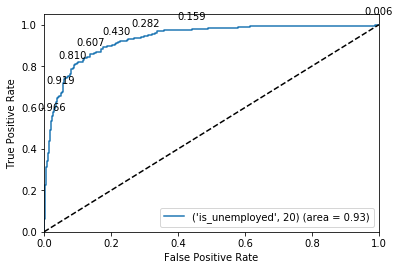

lost_job_1mo 10
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_lost_job_1mo.csv


HBox(children=(FloatProgress(value=0.0, max=358.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=45.0), HTML(value='')))

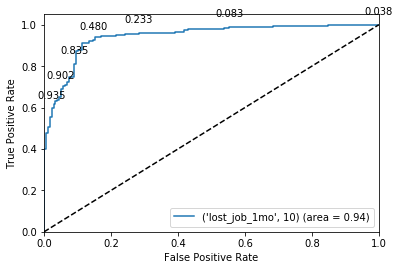

job_search 10
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_job_search.csv


HBox(children=(FloatProgress(value=0.0, max=436.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=55.0), HTML(value='')))

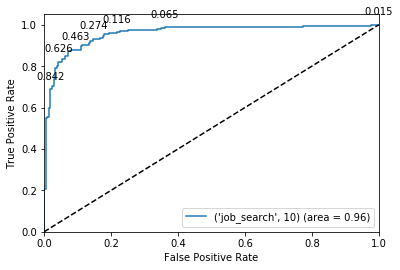

is_hired_1mo 10
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_is_hired_1mo.csv


HBox(children=(FloatProgress(value=0.0, max=297.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=38.0), HTML(value='')))

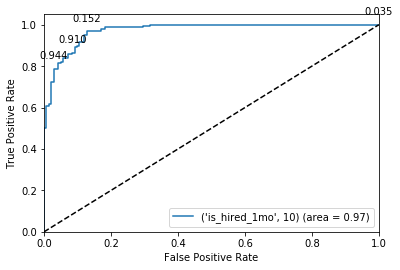

job_offer 10
/home/manuto/twitter/data/may20_9Klabels/data_binary_pos_neg_balanced/val_job_offer.csv


HBox(children=(FloatProgress(value=0.0, max=692.0), HTML(value='')))

HBox(children=(FloatProgress(value=0.0, max=87.0), HTML(value='')))

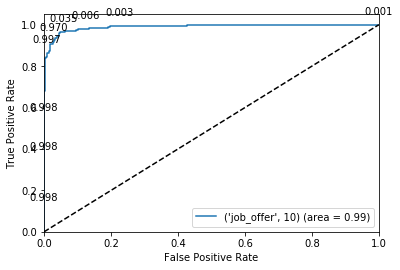

In [8]:
for column in [ ("is_unemployed",20), 
                 ("lost_job_1mo", 10),
                 ("job_search", 10),
                 ("is_hired_1mo", 10), 
                 ("job_offer", 10) 
              ]:
    print(column[0], column[1]) 
    path_eval_data = create_path_eval_data(data_folder, preprocessing, column[0])
    path_model = create_path_models(model_name, data_folder, preprocessing, column[0], best_epochs[column[0]])
    results_per_label[column[0]] = plot_ROC(model_type, path_model, path_eval_data, preprocessing, column[1])

/home/manuto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


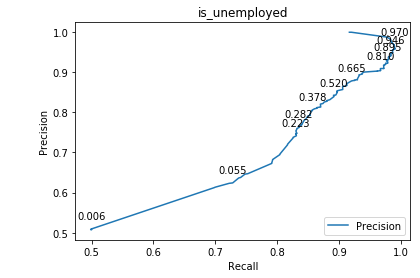

/home/manuto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in long_scalars
  app.launch_new_instance()


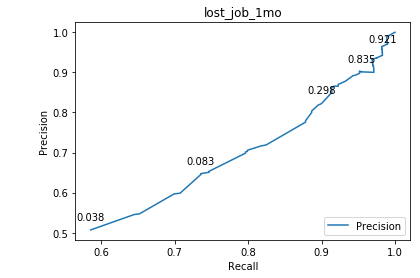

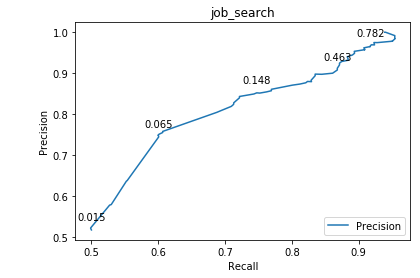

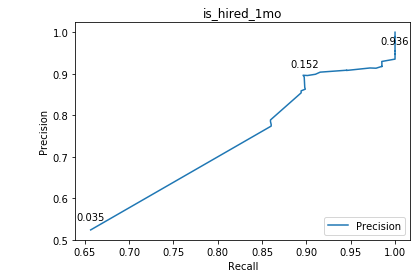

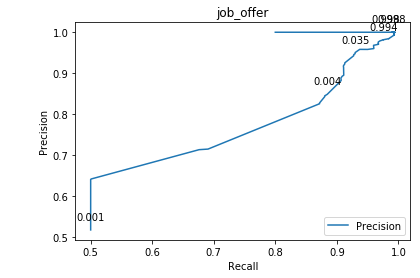

In [9]:
for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    results_bis = pd.DataFrame()
    y_true = results_per_label[column][0]
    y_pred = results_per_label[column][1]
    merged = pd.DataFrame(data=y_true)
    merged["pos_model"] = y_pred
    merged['neg_model'] = abs(1-merged['pos_model'])
    merged["pos"] = merged["labels"]
    merged['neg'] = abs(1-merged['pos'])
    threshold_list = results_per_label[column][2]
    for threshold in threshold_list:
        TP = np.sum(merged.loc[merged['pos_model'] > threshold, 'pos'])
        FP = np.sum(merged.loc[merged['pos_model'] > threshold, 'neg'])
        TN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])
        FN = np.sum(merged.loc[merged['neg_model'] > threshold, 'pos'])
        Recall = TP/(TP+FN)
        Precision = TP/(TP+FP)
        
        results_bis = results_bis.append({'threshold': threshold, 'Recall': Recall, 'Precision': Precision}, ignore_index=True)

    plt.figure()
    plt.plot(results_bis['Recall'], results_bis['Precision'])
    
    count = 0
    for t,x,y in zip(threshold_list, results_bis['Recall'], results_bis['Precision']):
#         print(t,x,y)
        count = count + 1

        label = "{:.3f}".format(t)

        if count%15 == 0 or count == 1:
#             print(count)
            plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center'
                    ) # horizontal alignment can be left, right or center
    plt.annotate(label, # this is the text
         (x,y), # this is the point to label
         textcoords="offset points", # how to position the text
         xytext=(0,10), # distance from text to points (x,y)
         ha='center'
        ) # horizontal alignment can be left, right or center
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(column)
    plt.legend(loc="lower right")

    plt.show()   

In [10]:
thresholds_dict = {
    'is_unemployed': 0.810,
    'lost_job_1mo':  0.835,
    'job_search':  0.463,  
    'is_hired_1mo':  0.910,
    'job_offer':     0.970,
}

is_unemployed Recall: 0.96 Precision 0.90
lost_job_1mo Recall: 0.95 Precision 0.90
job_search Recall: 0.86 Precision 0.90
is_hired_1mo Recall: 0.98 Precision 0.91
job_offer Recall: 0.96 Precision 0.97


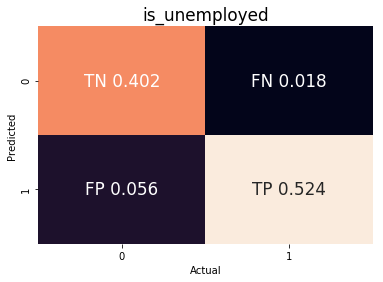

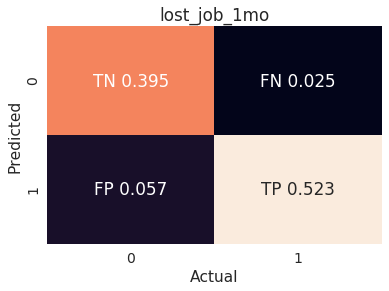

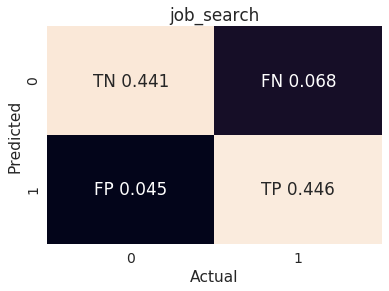

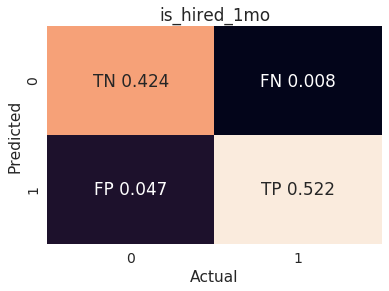

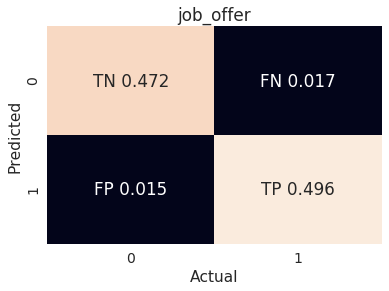

In [11]:
for column in ["is_unemployed", "lost_job_1mo", "job_search", "is_hired_1mo", "job_offer"]:
    y_true = results_per_label[column][0]
    y_pred = results_per_label[column][1]
    merged = pd.DataFrame(data=y_true)
    merged["pos_model"] = y_pred
    merged['neg_model'] = abs(1-merged['pos_model'])
    merged["pos"] = merged["labels"]
    merged['neg'] = abs(1-merged['pos'])
    threshold = thresholds_dict[column]
    TP = np.sum(merged.loc[merged['pos_model'] > threshold, 'pos'])
    FP = np.sum(merged.loc[merged['pos_model'] > threshold, 'neg'])
    TN = np.sum(merged.loc[merged['neg_model'] > threshold, 'neg'])
    FN = np.sum(merged.loc[merged['neg_model'] > threshold, 'pos'])    
    total = sum([TP, FP, TN, FN]) 
    print(column, 'Recall:', str(TP/(TP+FN))[:4],  'Precision', str(TP/(TP+FP))[:4],
         )

    confusion_matrix = np.array([
                                [TN/total, FN/total],
                                [FP/total, TP/total]
                                ])
    labels =           np.array([
                                ['TN', 'FN'],
                                ['FP', 'TP']
                                ])
    
    labels = (np.asarray(["{0} {1:.3f}".format(string, value)
                      for string, value in zip(labels.flatten(),
                                               confusion_matrix.flatten())])
         ).reshape(2, 2)
    
    fig, ax = plt.subplots(1)
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(confusion_matrix, annot=labels, fmt="", cbar=False)
    ax.set(xlabel='Actual', ylabel='Predicted')
    plt.title(column)